## IDENTIFYING THE PROBLEM AND INSPECTING THE DATA

Acute myocardial stroke is a type of acute coronary syndrome characterized by the sudden onset of ischemic distress (lack of blood supply) to a part of the heart muscle, caused by the acute and total obstruction of one of the coronary arteries that supply it.

Myocardial stroke is the leading cause of death for both men and women worldwide.

The main reason for this is that the primary risk of acute myocardial stroke lies in the pre-hospital phase, meaning before admission to the hospital; mortality during this phase exceeds 40%. Once admitted to the hospital, if done promptly (ideally within four hours), modern treatments such as angioplasty and thrombolysis enable a satisfactory recovery from the stroke, and complications are relatively uncommon.

**Expected Outcome**

Given a dataset where we can find features like gender, age, various diseases, and smoking status, the classification goal is to predict whether a patient is likely to get stroke. Each row in the DataSet provides relavant information about the patient.

**Objective**

Since the target feature (stroke) is discrete, the prediction falls into two categories: the patient is likely to get a stroke or not. Therefore, we have a classification problem.

**Identify the data sources**

The dataset includes 5110 records and 12 attributes: 
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown". "Unknown" means that the information is unavailable for this patient
- stroke: 1 if the patient had a stroke or 0 if not

Let's start by loading the libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Let's load the DataSet into a DataFrame:

In [2]:
stroke = pd.read_csv(r"C:\Users\maria\Desktop\proyecto infarto de miocardio\healthcare-dataset-stroke-data.csv")
print(len(stroke))
stroke.head()

5110


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Let's examine the different columns:

In [3]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Let's take a look at the properties of the dataset:

In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The DataFrame contains 12 columns. We have a target variable, "stroke", which informs us whether the patient has had a stroke:

- 1, if the patient has suffered a stroke.
- 0, if the patient has not suffered a stroke.

Let's check for missing values:

In [5]:
stroke.isnull().sum().sort_values()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
bmi                  201
dtype: int64

As we can observe, we are missing 201 data points for the target bmi. Let's examine the correlation between the bmi target and the stroke target:

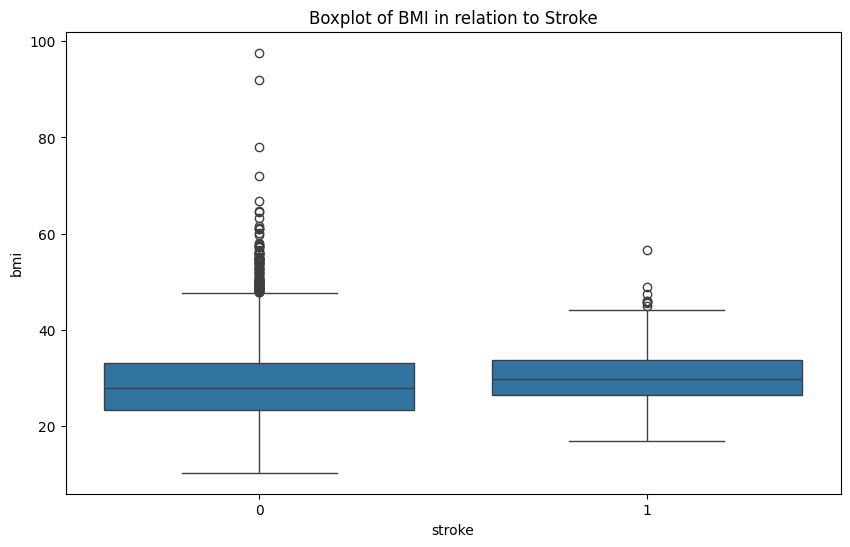

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='bmi', data=stroke)
plt.title('Boxplot of BMI in relation to Stroke')
plt.show()

We observe that in this case, bmi is highly correlated with the likelihood of stroke. Let's remove the rows with null bmi values:

In [7]:
stroke = stroke.dropna(subset=['bmi'])

Let's check again for missing data:

In [8]:
stroke.isnull().sum().sort_values()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

We observe that we no longer have missing data. We can proceed with the exploratory data analysis.